<a href="https://colab.research.google.com/github/SBiscardi/cd-202202-santiago-biscardi/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyproj


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.2 MB/s 


In [ ]:
import pandas as pd
from IPython.core.display import Math
from numpy import mat

In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)


In [ ]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [ ]:
from datetime import datetime

In [ ]:
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'],format="%d/%m/%Y")

In [ ]:
import pyproj
P=pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
df['x'], df['y']=P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fecha_contagio2,x,y,distancia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,709584.027559,782579.281866,1056321.650279
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,709262.121378,782963.354103,1056390.043202
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,710847.924654,784163.825097,1058344.476722
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-10,710863.366771,781635.895608,1056483.37593
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,709314.159319,781570.969374,1055393.534299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-06,709918.546763,782204.438977,1056268.801837
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,709466.644754,781388.734012,1055361.101047
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,709492.782783,784279.996264,1057520.911542
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,710198.574916,780930.648555,1055514.343923


In [ ]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])

In [ ]:
lat_alcaldia = 7.06
lon_alcaldia = 73.08
x_alcaldia, y_alcaldia = P(lon_alcaldia, lat_alcaldia)
x_alcaldia, y_alcaldia

(4217603.760073725, 19077136.29452536)

In [ ]:
df['distancia'] = None

In [ ]:
import math

In [ ]:
for i in range(df.shape[0]):
  df.loc[i,'distancia'] = math.sqrt(((df['x'][i] - lat_alcaldia)**2) +((df['y'][i] - lon_alcaldia)**2))


In [ ]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datosf = datosf.drop('año',axis=1)
datosf = datosf.drop('cod_pais_o',axis=1)
datosf = datosf.drop('condicion_final',axis=1)
datosf = datosf.drop('fecha_defuncion',axis=1)
datosf = datosf.drop('certif_defuncion',axis=1)

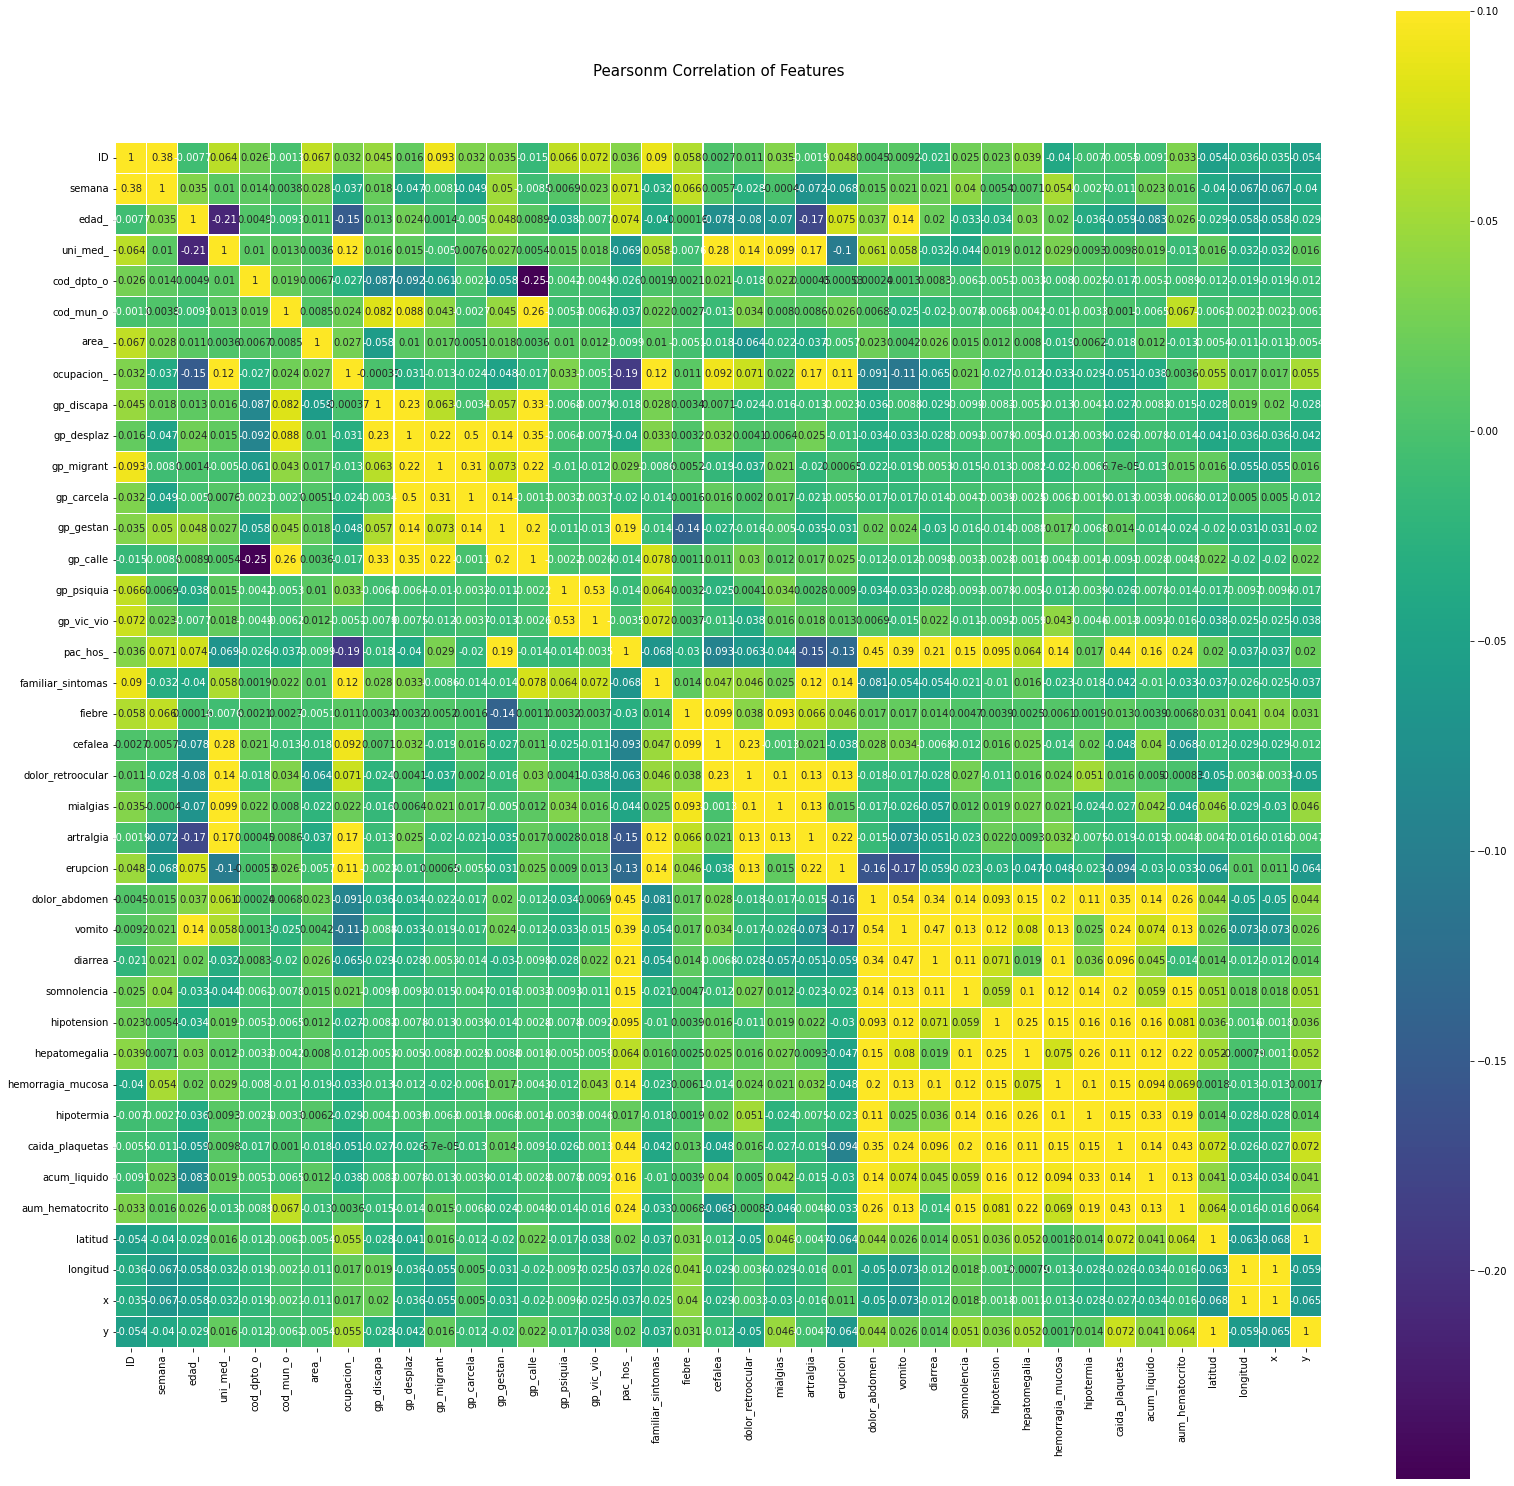

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize =(27,27))
plt.title('Pearsonm Correlation of Features', y = 1.05, size = 15)
sb.heatmap(datosf.astype(float).corr(),linewidths = 0.1,vmax = 0.1, square= True, cmap=colormap, linecolor ='white', annot = True)


In [ ]:
ab = 100
res = 10

min_x = df['x'].min()
min_y = df['y'].min()
max_x = df['x'].max()
max_y = df['y'].max()

print(min_x - ab)
print(min_y - ab)
print(max_x + ab)
print(max_y + ab)


707888.5715792507
780401.6340403266
712463.8865034583
785151.1759298786


In [ ]:
from math import ceil

l_x = ceil((df['x'].max()-df['x'].min())/res)
l_y = ceil((df['y'].max()-df['y'].min())/res)

l_y,l_x

(455, 438)